# Open Source GIS -- Lab 9

Directions: Answer the questions in this document and post them to the JupyterHub Server.

The GIS techniques needed to do this activity are demonstrated in the *Open Source GIS Jupyter Notebook*.

**Load packages**

In [ ]:
options(warn=-1) # turn warnings off
library(sf) # simple features (vector data)
library(raster) # raster features
library(terra) # raster features
library(spData) # load geographic data
library(geojsonio)
library(tidyverse)
library(tmap)
library(dplyr)
library(spDataLarge)
library(terra)
library(rasterVis)
library(raster)
library(colorRamps)
library(ggplot2)

**Load data**

World data set

In [ ]:
data("World") # World
World$area = as.numeric(World$area) # fixes World data issues
head(World)

Rivers data set

In [ ]:
data("rivers") # rivers
head(rivers)

Elevation, land classification, and Zion National Park data set

In [ ]:
srtm = rast(system.file("raster/srtm.tif", package = "spDataLarge")) # elevation
nlcd = rast(system.file("raster/nlcd.tif", package = "spDataLarge")) # land classification
zion = read_sf(system.file("vector/zion.gpkg", package = "spDataLarge")) # zion

## Exercises

What is the average Happy Planet Index (HPI) value throughout the world? What is the minimum value? What is the maximum value?

Create a static map of the Happy Planet Index using the *blue2red* color scheme (palette = blue2red(5)) and manual breaks (breaks = c(0, 10, 20, 30, 40, 50)).

Below is an image of the land classification scheme around Zion National Park. Which type of land classes dominate the space?

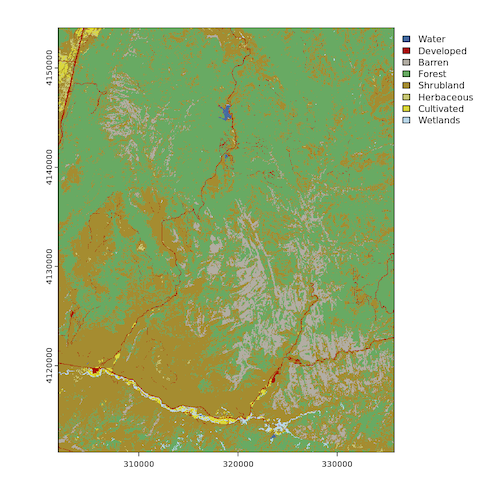

Create a static map of the nlcd classification scheme masked with an outline of Zion National Park overlayed.

Create an interactive map of the rivers of the world. Use the OpenTopoMap (tm_basemap(leaflet::providers$OpenTopoMap)) as the basemap and label the name of the river using (popup.vars = ) argument.

Create an interactive map of elevation around Zion National Park. Use the OpenStreetMap(tm_basemap(leaflet::providers$OpenStreetMap.Mapnik) as the basemap and overlay an outline of Zion National Park.

## Bonus Exercise

Recently, the USGS installed a streamgage on Bayou DeSaird at ULM to monitor stream heights (in feet).

In [ ]:
library(dataRetrieval) # package used to get USGS data
# Bayou DeSiard at NE Drive at Monroe, La
siteNumber <- "07366497" # site number
DeSiardInfo <- readNWISsite(siteNumber)
parameterCd <- "00065" # stream height code

DeSiard <- whatNWISsites(sites = "07366497")

In [ ]:
GageHeightFt <- readNWISdv(
  siteNumber, parameterCd,
  "2022-01-19", "2023-03-12"
)

head(GageHeightFt)

Using the daily data on stream heights at Bayou DeSaird, what are the minimum and maximum heights the gaging system has monitored?

The following chunks of code will create an interactive map of the gaging station at Bayou DeSiard and provide a daily line graph of stream heights (in feet).

In [ ]:
DeSiard <- DeSiard %>%
st_as_sf(coords = c('dec_long_va', 'dec_lat_va'), crs = 4326)

DS_map <- tm_basemap(leaflet::providers$OpenStreetMap.Mapnik) +
    tm_shape(DeSiard) +
    tm_dots(size = .25, col = 'red', popup.vars = c('station_nm'))

tmap_leaflet(DS_map)

In [ ]:
ggplot(aes(x = Date, y = X_00065_00003), data = GageHeightFt) +
    geom_line() + ylab("Stream Height (ft)") + theme_minimal()

When was the last day Bayou DeSiard was above average in stream height (12.41 ft)?